# Classification test

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# df = pd.read_csv("data/BTCUSDT-hour-target-features.csv")
df = pd.read_csv("data/BTCUSDT-minute-target-features.csv")

# df = pd.read_csv("data/BTCUSDT-hour-target-features-all-rate.csv")
# df = pd.read_csv("data/BTCUSDT-hour-target-features-all-puell.csv")

# df = pd.read_csv("data/BTCUSDT-hour-predict.csv")
# dfd = pd.read_csv("data/classification_test.csv")

In [79]:
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,volatility_dc_wband_10,volatility_pband_50,volatility_wband_20,volatility_ui_30,volume_cmf_50,volume_cmf_50_rate_200,volume_eom_amplified,volume_fi_amplified,volume_mfi_50,volume_nvi_o_close_rate_50
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,1502942459999,7.564907e+03,3,0.075183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,1502942519999,0.000000e+00,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1502942579999,1.117543e+03,2,0.261074,...,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,1502942639999,5.117185e+01,3,0.012008,...,NaN,-inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,1502942699999,5.999993e+02,1,0.140796,...,NaN,-inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697268,2020-11-12 18:46:00,16045.00,16056.93,16040.00,16056.92,65.146604,1605206819999,1.045231e+06,597,12.829899,...,0.330375,1.998675,0.238439,0.306079,-0.115980,-0.001518,20.620891,-6.148576,54.494040,-150.681855
1697269,2020-11-12 18:47:00,16056.92,16059.00,16043.55,16053.55,54.421275,1605206879999,8.735080e+05,885,15.057550,...,0.342531,1.893921,0.234745,0.297438,-0.109773,-0.001336,20.676303,-6.218156,57.613898,-150.681855
1697270,2020-11-12 18:48:00,16053.54,16062.24,16051.67,16053.36,54.832207,1605206939999,8.803688e+05,680,33.425916,...,0.362670,1.861294,0.229047,0.280300,-0.094394,-0.001282,20.654262,-6.198398,57.081217,-150.191500
1697271,2020-11-12 18:49:00,16053.37,16060.85,16046.46,16051.34,61.684564,1605206999999,9.902220e+05,814,17.074721,...,0.362609,1.783404,0.220510,0.261838,-0.080703,-0.001226,20.662158,-6.235546,57.660618,-144.977529


In [3]:
df = df.loc[:,~df.columns.duplicated()]

In [4]:
len(df)

1697273

In [5]:
# a = df1["sma_close_50"][500:1000] == df["sma_50_o_close"][500:1000]
# a.value_counts()

In [6]:
# df1["sma_close_50"][500:1000], df["sma_50_o_close"][500:1000]

In [74]:
indicators = list(df.columns)[13:]
indicators.append("target")

In [7]:
indicators = ['volume_nvi_o_close_rate_50',
 'mom_srsi_10_d',
 'bb',
 'volatility_dc_wband_10',
 'volatility_bb_pband_100',
 'volatility_bb_wband_200',
 'trend_trix_20_log',
 'trend_vi_50_amp',
 'mom_rsi_30',
 'volume_cmf_50_rate_200',
 'trend_sma_200_diff_o_close_log',
 'mom_ppo_30_hist',
 'trend_sma_50_diff_log',
 'target']

In [12]:
d = df.copy()
d.dropna(inplace=True)
ft_split = 20000
close = d["close"][-ft_split:]

d = d[list(indicators)].copy().astype(np.float32)

X = d.drop(["target", "close"], axis=1, errors="ignore")[:-ft_split]
y = d["target"][:-ft_split]

X_ft = d.drop(["target", "close"], axis=1, errors="ignore")[-ft_split:]
y_ft = d["target"][-ft_split:]

In [13]:
# X_ft.info()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

## Precision bug documentation

- Not assigning 

Text(-1.5, 0.5, 'Predicted label')

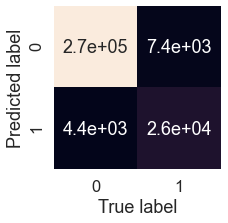

In [16]:
y_preds = model.predict(X_test)	

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

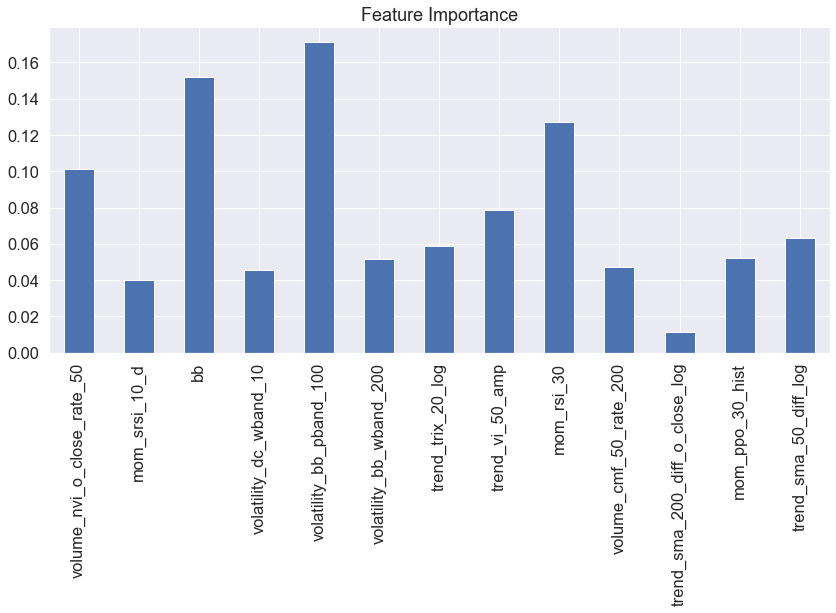

In [17]:
feature_dict = dict(zip(X_train.columns, list(model.feature_importances_)))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(14, 6));

In [32]:
d = {}
d["precision"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='precision'))
d

{'precision': 0.6310208689903781}

In [33]:
d["recall"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='recall'))
d

{'precision': 0.6310208689903781, 'recall': 0.5788185127798143}

In [34]:
d["f1"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='f1'))
d

{'precision': 0.6310208689903781,
 'recall': 0.5788185127798143,
 'f1': 0.5863005409669492}

1200
1200


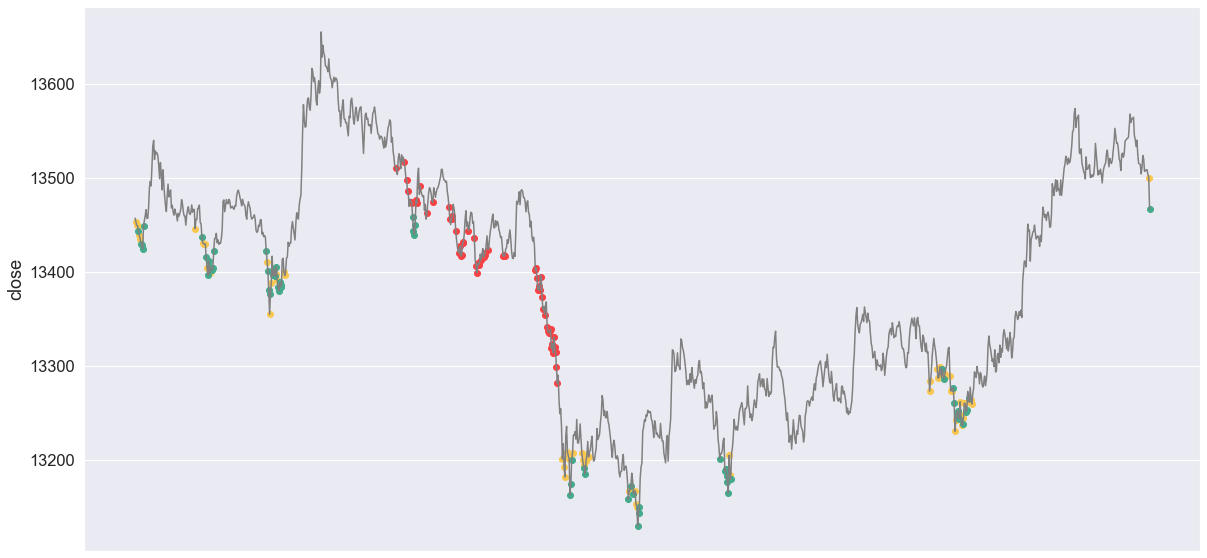

In [81]:
a = 0
b = 1200 #max 20000
results = model.predict(X_ft[a:b])
scatter_results = list(map(lambda x, c: c if x == 1 else None, results, close[a:b]))

s_correct = list(map(lambda x, t, c: c if x == 1 and t == 1 else None, results, y_ft[a:b], close[a:b]))
s_wrong = list(map(lambda x, t, c: c if x == 1 and t == 0 else None, results, y_ft[a:b], close[a:b]))
s_missed = list(map(lambda x, t, c: c if x == 0 and t == 1 else None, results, y_ft[a:b], close[a:b]))

fig,ax = plt.subplots(figsize=(20, 10))

print(len(close[a:b]))
print(len(scatter_results))

rows = len(close[a:b])

# ax.scatter(range(rows), 
#             scatter_results,
#             color="#43aa8b")


ax.scatter(range(rows), 
            s_missed,
        color="#f9c74f")

ax.scatter(range(rows), 
            s_correct,
        color="#43aa8b")

ax.scatter(range(rows), 
            s_wrong,
        color="#f94144")

ax.set_xlabel("time")
ax.set_ylabel("close")
ax.plot(range(rows),
        close[a:b],
        color="gray")

ax.tick_params(labelbottom=False)
ax.axes.xaxis.set_visible(False)

In [ ]:
test = pd.DataFrame(results, columns=["target"])
test["close"] = list(close)

In [78]:
test.to_csv("data/ft-dca-minute-test.csv", index=False)

## Documentation of scores
| Modules (in order) | Precision (cv=5) E=error| F1 | TP:FP (TP/FP) | Notes |
| --- | :---: | :---: | :---: | --- |
| ` ` `sma` ` ` `volatility` `volume` | E:0. | 0. | 180/97 | |
| `momentum` `sma` `trend-` `volatility` `volume` | E:0. | 0. |  | |



| `momentum` `sma` `trend-` `volatility` `volume` | E:0. | 0. |  | |



In [76]:
from joblib import dump, load

In [77]:
dump(model, 'models/model_minute_v1.test.joblib') 

['models/model_minute_v1.test.joblib']